# Review

<font color='grey'><b>Hello! My name is Maxim and I will be reviewing your project. I've put all my comments into markdown cells with different background colors.</b></font>

<div class="alert alert-success" role="alert">
  If you did something great I'll be using green color for my comment.
</div>

<div class="alert alert-warning" role="alert">
Yellow cell means it is an optional recommendation -- like when I think something can be improved, or simply offer an advice for your future work.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work before I can accept it then the color will be red
</div>

<div class="alert alert-info" role="alert">
  If you'd want to leave your own comment or ask a question or anything: use this cell style, so it would be easier for me to notice in the text  and adress it ;)
</div>

<font color='grey'><b>And, please! Do not delete my comments in further iterations of your project (if there would be any).</b></font>

<div class="alert alert-info" role="alert">
  Hello! Thanks for reviewing my project. Based on your feedback, I have changed the range to min and max and tried to subplot in the same plot. This was possible only with your inputs. Thanks again.
</div>

<div class="alert alert-success" role="alert">
Thank you for your feedback, Sindhu - it was my pleasure!
</div>

## Project Description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

### Step 1: Open the Data File and reading the general information

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [5]:
# file = pd.read_csv('C:/Users/SINDHU/Desktop/Integrated project/games.csv')
file = pd.read_csv('/datasets/games.csv')
file.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Reading the file using read_csv command, assigned to a variable file.

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**The Data Set has 11 columns, 16715 rows, Year_of_Release can be an integer data type. User_Score can be float data type. Data types for these two columns have to be changed. The columns Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating has missing values. 

In [7]:
file.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
file['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Reading Unique platforms in the dataset, and number of games in each platform.

In [9]:
file['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

**Reading the number of games released in each year. The highest number of games released is 2008 with 1427 games.

In [10]:
file['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Reading the unique genres, and how many games fall under each genre. The highest number of games fall under action genre.

In [11]:
file['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Reading the unique rating given for each game.

In [12]:
file['Name'].value_counts()

Need for Speed: Most Wanted             12
Ratatouille                              9
Madden NFL 07                            9
LEGO Marvel Super Heroes                 9
FIFA 14                                  9
                                        ..
Neverwinter Nights Diamond               1
The Ultimate Red Ball Challenge          1
Ninja Gaiden: Dragon Sword               1
Pop Cutie! Street Fashion Simulation     1
Warhammer Online: Age of Reckoning       1
Name: Name, Length: 11559, dtype: int64

In [13]:
file.query("Name=='LEGO Marvel Super Heroes'")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
730,LEGO Marvel Super Heroes,X360,2013.0,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
945,LEGO Marvel Super Heroes,PS3,2013.0,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1139,LEGO Marvel Super Heroes,PS4,2013.0,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1959,LEGO Marvel Super Heroes,XOne,2013.0,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+
2313,LEGO Marvel Super Heroes,3DS,2013.0,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+
2778,LEGO Marvel Super Heroes,WiiU,2013.0,Action,0.31,0.35,0.02,0.06,82.0,8,E10+
3876,LEGO Marvel Super Heroes,PSV,2013.0,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN
5054,LEGO Marvel Super Heroes,DS,2013.0,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
8369,LEGO Marvel Super Heroes,PC,2013.0,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+


**Reading the unique games in the dataset and the platforms they fall under. The game LEGO Marvel Super Heroes released in 9 platform

In [14]:
file['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
0.6       2
1.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

**Reading unique values from User_Score Column, it has tbd(to be determined). Where the ratings are not yet given. 

<div class="alert alert-success" role="alert">
So far so good!
</div>

### Step 2: Preparing the Data For Analysis

In [15]:
file.columns = map(str.lower, file.columns)
file.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**renamed the column names to lowercase.

<div class="alert alert-success" role="alert">
Correct!
</div>

In [16]:
file.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Checking missing values in the dataset, it has missing values in name, year_of_release, genre, critic_score, user_score, rating.

In [17]:
file['user_score']= file['user_score'].fillna(-1)
file['rating'] = file['rating'].fillna('xyz')
file['critic_score'] = file['critic_score'].fillna(-1)
file['year_of_release'] = file['year_of_release'].fillna(-1)
file.loc[file['user_score']=='tbd','user_score']='-2'

**Filled missing values in user_score with '-1', rating with 'xyz', critic_score with '-1', year with '-1', the value tbd in user_score with '-2'.

In [18]:
file['year_of_release'] = file['year_of_release'].astype(int)
file['user_score'] = file['user_score'].astype(float)

**Changed Data type of year_of_release with Integer Data type, user_score datatype to float data type.

In [19]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [20]:
file.isnull().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**filled empty values for all columns. As the number of missing values in critic_score, user_score, rating is almost 50% of data, i cannot fill this with mean, median values which doesn't give a accurate analysis further. I am filling this with -1 where i will exclude these values from the analysis. For user_score column there are 2424 rows tbd. So i am considering here tbd as -2 to change datatype to float which will help me to find the mean and median of the score in further analysis. Because tbd which is character will throw an error while finding the sum, count, etc. Changing the datatype of user_score to float. I have filled year_of_release with -1 and rating with xyz.

<div class="alert alert-success" role="alert">
Seems appropriate, but let's see where are you heading with that ;)
</div>

##**I believe because the users didn't provide rating yet.So few rows are missing. And few games doesn't have complete information so year of release is missing.

In [21]:
file['total_sales'] = file['na_sales']+file['eu_sales']+file['jp_sales']+file['other_sales']
file.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,xyz,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,xyz,31.38


**I have calculated the total sales for each game in all regions into total_sales column.

### Step 3 : Analyzing the Data

**1. Look at how many games were released in different years. Is the data for every period significant?

Text(0, 0.5, 'Number of Releases')

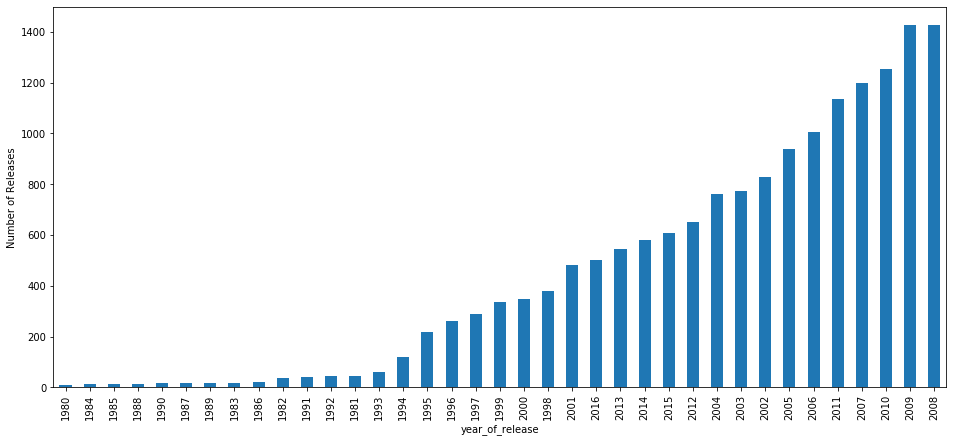

In [22]:
#games_in_year = file['year_of_release'].value_counts()
games_by_year = file.query('year_of_release != -1').groupby('year_of_release')['name'].count().sort_values(ascending=True).plot(kind='bar', figsize=(16,7))
games_by_year.set_ylabel("Number of Releases")

In [23]:
file.query('year_of_release != -1').groupby('year_of_release')['name'].count().sort_values(ascending=True)

year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: name, dtype: int64

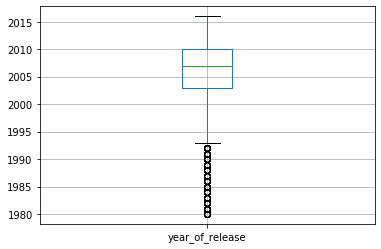

In [24]:
file.query("year_of_release!=-1").boxplot(column='year_of_release')

**Based on my analysis looking at the graph, in year 1980 the number of games released is 9 and it gradually increase every year, and in 2008 it increased to 1450 game releases. So for each year the game release are not significant. The boxplot shows that the games released before 1994 are outliers.

<div class="alert alert-success" role="alert">
Very nice! Although, I didn't understand the necessity of sorting the data by value magnitude -- I mean, you can clearly see the trend even when it's sorted by year (ascending prior 2008 and decending after). But your game -- your rules =))
</div>

#### **2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

#### **3.Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

#### **4.Work only with the data that you've decided is relevant. Disregard the data for previous years.

#### **5.Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

#### **6.Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

#### **7.Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and 

#### **8.calculate the correlation between reviews and sales. Draw conclusions.

#### **9.Keeping your conclusions in mind, compare the sales of the same games on other platforms.

#### **10.Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


Text(0, 0.5, 'sales')

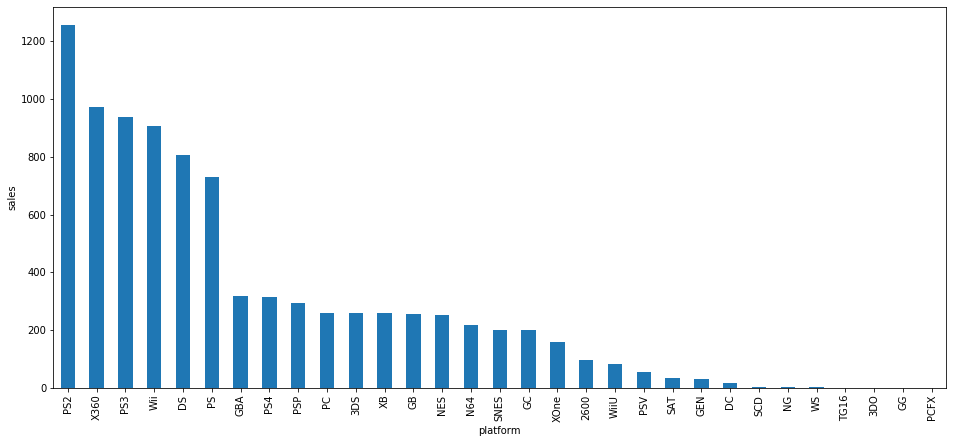

In [25]:
platform_sales = file.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16,7))
platform_sales.set_ylabel("sales")

**I would like to know how do i label x and y axis in graphical representation here. I have tried xlab, ylab, x-axis, y-axis these didn't work for me.

<div class="alert alert-success" role="alert">
Very nice graph!
</div>

<div class="alert alert-warning" role="alert">
<del>The df.plot() function returns a matplotlib.axes.AxesSubplot object. You can set custom labels on that object as follows:
    
    platform_sales.set_xlabel("x label")

    platform_sales.set_ylabel("y label")
(see the cell above)
</del></div>

<div class="alert alert-success" role="alert">
Majestic!
</div>

In [26]:
platform_sales_group = file.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_group

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**Top platforms with the greatest sales are arranged in descending order.

In [27]:
year_by_sales = file.query('year_of_release!=-1').pivot_table(index=['platform','year_of_release'],values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],aggfunc=['sum'])
year_by_sales.columns=['eu_sales','jp_sales','na_sales','other_sales','total_sales']
year_by_sales.sort_values(by='total_sales', ascending=False)


eu_sales  jp_sales  na_sales  other_sales  \
platform year_of_release                                              
PS2      2004                56.01     19.17     96.78        39.85   
Wii      2009                58.31     16.57    114.55        17.54   
PS2      2002                65.27     21.85     96.54        21.72   
         2003                61.20     18.88     83.54        20.69   
Wii      2008                46.52     12.69     97.12        14.99   
...                            ...       ...       ...          ...   
PCFX     1996                 0.00      0.03      0.00         0.00   
PC       1988                 0.02      0.00      0.00         0.01   
3DO      1994                 0.00      0.02      0.00         0.00   
DS       1985                 0.00      0.02      0.00         0.00   
DC       2007                 0.00      0.02      0.00         0.00   

                          total_sales  
platform year_of_release               
PS2      2004                  211.81  
Wii      2009                  206.97  
PS2      2002                  205.38  
         2003                  184.31  
Wii      2008                  171.32  
...                               ...  
PCFX     1996                    0.03  
PC       1988                    0.03  
3DO      1994                    0.02  
DS       1985                    0.02  
DC       2007                    0.02  

[238 rows x 5 columns]

**Calculated total sales based on the platform by year. PS2 platform is having the highest sales in 2004.

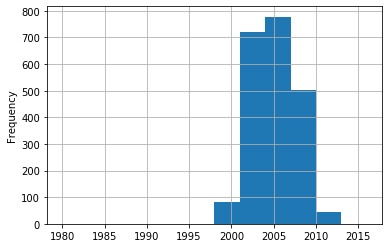

In [28]:
not_equa = file
not_equa = file.query('year_of_release!=-1')
not_equa[not_equa["platform"] == "PS2"]["year_of_release"].plot(kind="hist", grid=True, bins=np.arange(min(not_equa['year_of_release']), max(not_equa['year_of_release']) + 3, 3))
#sample = file.query('platform == "PS2"')
#sample.plot(x="year", y="total_sales", xlim=(1950,2020), kind="line", grid=True)

**Based on PS2 platform analysis, Released in 1999 & had good sales since it started, and reached highest in 2004-2008, and in 2009 it dropped to 60% and ended the sales in 2012, later 2012 it has zero sales.

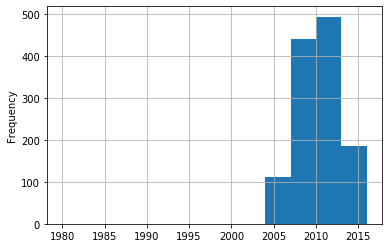

In [29]:
file[file["platform"] == "X360"]["year_of_release"].plot(kind="hist", grid=True, bins=np.arange(min(not_equa['year_of_release']), max(not_equa['year_of_release']) + 3, 3))
#sample = file.query('platform == "X360"')
#sample.plot(x="year", y="total_sales", xlim=(1990,2020), ylim=(1,50), kind='line')

**Based on the distribution, X360 was release in 2012, had a little sales when it started and reached highest in 2007-2012 and gradually dropped 60% of sales in 2013-2015 and since 2015 it has very little sales.

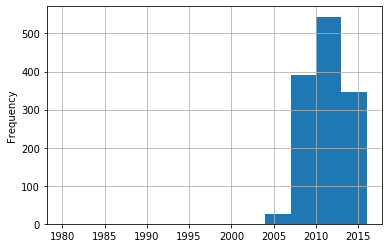

In [30]:
file[file["platform"] == "PS3"]["year_of_release"].plot(kind="hist", grid=True, bins=np.arange(min(not_equa['year_of_release']), max(not_equa['year_of_release']) + 3, 3))
#sample = file.query('platform == "PS3"')
#sample.plot(x="year", y="total_sales", xlim=(1990,2020), kind='line')

**Based on the distribution, PS3 was released in 2014, had a little sales when it started and reached highest in 2008-2012 and gradually dropped 30% of sales in 2013-2015 and since 2015 it has little sales.

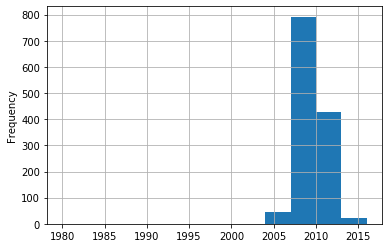

In [31]:
file[file["platform"] == "Wii"]["year_of_release"].plot(kind="hist", grid=True, bins=np.arange(min(not_equa['year_of_release']), max(not_equa['year_of_release']) + 3, 3))
#sample = file.query('platform == "Wii"')
#sample.plot(x="year", y="total_sales", xlim=(1990,2020), kind='line')

**Based on the distribution, Wii was released in 2004, had a little sales when it started and reached highest in 2008-2012 and dropped 90% of sales in 2013 and the sales ended in 2015.

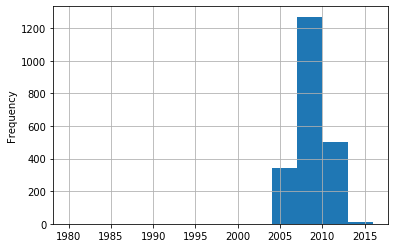

In [32]:
file[file["platform"] == "DS"]["year_of_release"].plot(kind="hist", grid=True, bins=np.arange(min(not_equa['year_of_release']), max(not_equa['year_of_release']) + 3, 3))

#sample = file.query('platform == "DS"')
#sample.groupby(['year','total_sales']).size().unstack().plot(kind='bar',stacked=True)
#plt.show()
#sample.plot(x="year", y="total_sales", range=(1990,2020), kind='hist')

**Based on my analysis DS released in 2003, had good sales since started and reached highest in 2007-2012 and dropped 90% of sales in 2013 and ended in 2015.

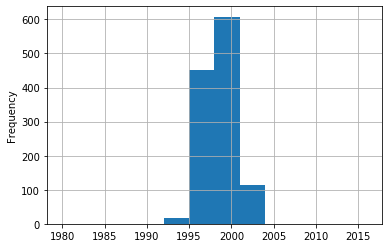

In [33]:
file[file["platform"] == "PS"]["year_of_release"].plot(kind="hist", grid=True, bins=np.arange(min(not_equa['year_of_release']), max(not_equa['year_of_release']) + 3, 3))

In [34]:
duration_platform = file.query('year_of_release!="-1"').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
duration_platform.columns=['platform', 'min_year', 'max_year']
duration_platform['duration'] = duration_platform.apply(lambda x:x['max_year']-x['min_year'], axis=1)
duration_platform

,platform,min_year,max_year,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [35]:
duration_platform['duration'].mean()

7.612903225806452

**Based on my analysis, PS started in 1992, has little sales till 1994, increased by 60% of sales since 1994-1998 and gradually increased by 15% of sales in 1999-2001 and dropped by 60% in 2002 and ended the sales between 2003-2004.

**Based on this, we cannot determine how many years it takes for new platforms to appear and old ones to fade, each platform is varied like PS2, DS has a very good sales since it started and platforms like PS took 3-4 years to appear and increase the sales. The average duration of all platforms is 7.6 years.

**Platforms having zero sales is PS, PS2, DS, Wii

**From the analysis, i believe that the data from the period 1998-2016 should be considered as the average duration is 7.6 years to build prognosis of 2017.

<div class="alert alert-success" role="alert">
That seems reasonable, I agree =)
</div>

<div class="alert alert-danger" role="alert">
<del>Although, I would recommend avoiding hard-coding the numbers directly (like you did in range). This is rather important, since hardcoding means you're tied to this particular dataset in order for your calculations to be precise.
<div class="alert alert-warning" role="alert">
And see if you can display all of your subplots in a single cell - pretty much like you did further below. Or check my comment regarding stackplots. I think that would greatly improve the informativeness ;)
<br>
Also, I would suggest to slightly increase the amount of bins in your hist, right now it looks like there are too few of them =)
</del></div>

<div class="alert alert-info" role="alert">
  I have changed the hard coding range to min and max of year of release. I have tried stackplot from the same page you have sent me. But i am not sure how do i write a loop. How do i give values for x and y. I am a novice in programming, so i am finding hard with programming sometimes. Trying to learn.
</div>

<div class="alert alert-success" role="alert">
No worries, you're doing absolutely fantastic! Nice fix of the bin range, I loved it =) Regarding stackplot - see my comments below.
</div>

In [36]:
greater_year = 1998
filtered_year = file.query('year_of_release >= @greater_year')
filtered_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,xyz,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,xyz,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,xyz,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,xyz,0.01


In [37]:
year_range=range(1980,1998)
print(year_range)
file.query('year_of_release in @year_range')['year_of_release'].value_counts()

range(1980, 1998)


1997    289
1996    263
1995    219
1994    121
1993     62
1981     46
1992     43
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     15
1984     14
1985     14
1980      9
Name: year_of_release, dtype: int64

In [38]:
latest_platforms = filtered_year.query('year_of_release >= 2014').sort_values(by='year_of_release', ascending=False)
latest_platform = list(latest_platforms['platform'].values)
latest_platform = set(latest_platform)
latest_platform

{'3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'}

In [39]:
#x = [0, 1, 2, 3]
#y1 = [10, 15, 20, 10]
#y2 = [0, 2, 8, 5]
#y3 = [6, 20, 18, 14]
#y = np.vstack(latest_platform)
#x = filtered_year['year_of_release']
#fig, ax = plt.subplots() 
#ax.stackplot(x, latest_platform[0], latest_platform[1], latest_platform[2])
#plt.show()

<div class="alert alert-warning" role="alert">
Also, check out what I did to your graph in the cell below ;) I think dots look slightly better than lines in this case =))
</div>

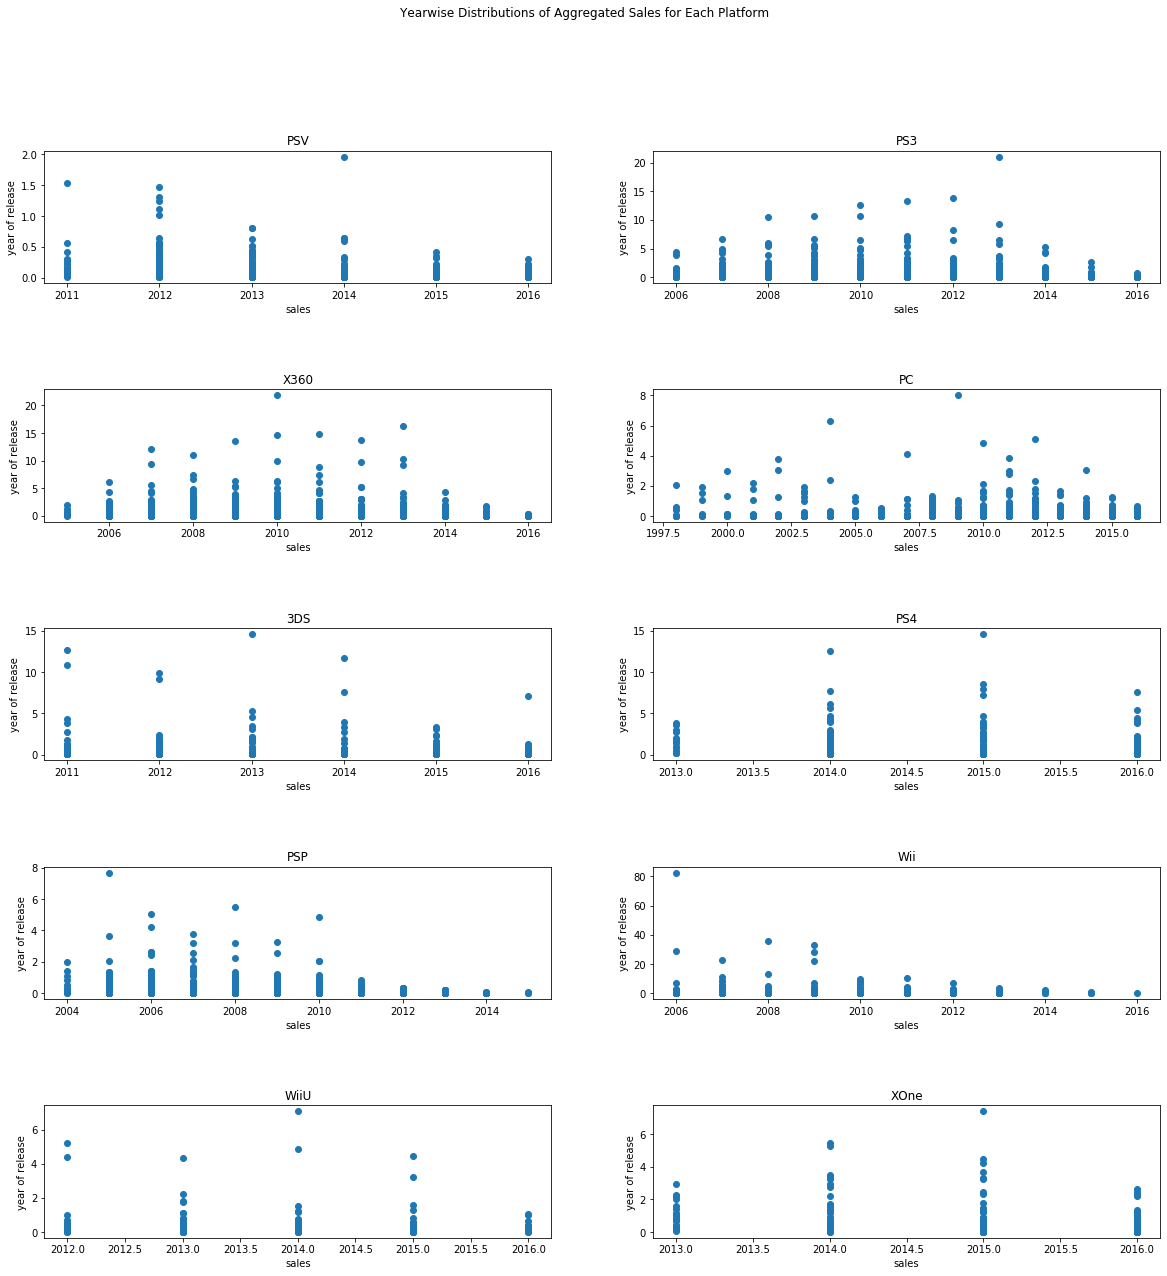

In [152]:
fig, axes = plt.subplots(5,2,figsize=(20, 20))
fig.subplots_adjust(hspace=0.8)
fig.suptitle('Yearwise Distributions of Aggregated Sales for Each Platform')
    
for ax, platform in zip(axes.flatten(), latest_platform):
    ax.plot(filtered_year.query('platform==@platform')['year_of_release'],
            filtered_year.query('platform==@platform')['total_sales'], 'o')
    ax.set(title=platform, xlabel="sales", ylabel="year of release")

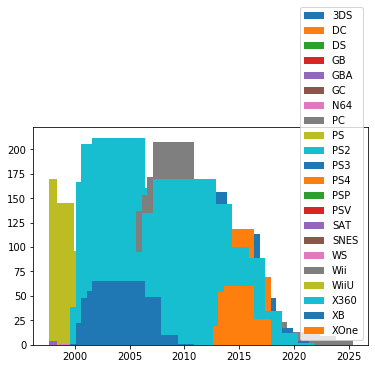

In [41]:
all_graphs = filtered_year.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
for platform in all_graphs.platform.unique():
    tmp = all_graphs[all_graphs["platform"] == platform]
    plt.bar(tmp["year_of_release"], tmp["total_sales"], label=platform)
plt.legend()



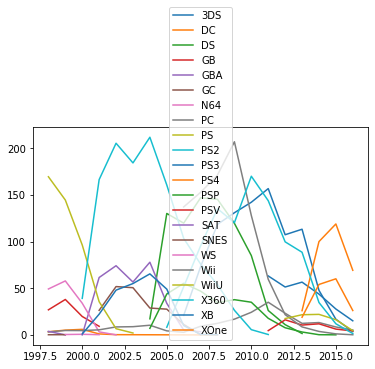

In [42]:
all_graphs = filtered_year.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
for platform in all_graphs.platform.unique():
    tmp = all_graphs[all_graphs["platform"] == platform]
    plt.plot(tmp["year_of_release"], tmp["total_sales"], label=platform)
plt.legend()

**From my analysis throught the graphs 3DS, PSP, Wii, PSV, X360 are shrinking slowly.
**PS4, Xone, WiiU are very slowly coming down.
**X360, PS4, PS3 are having a higher sales. 

**Hello Soslan, i tried stackplot here, but i am not achieving results, could you please suggest the best way for subplots which is easy to understand. I feel from this graph i am not able to pull the accurate results.

<div class="alert alert-warning" role="alert">
If you are referring to what I'm thinking about you referring, I.e. plots stacked on top of each other in a single figure window, then check this out:
    
    https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
There are a couple of very detailed examples on how to use stackplot. Including the automatted plotting with for loop.
<br>
<br>
Whether it is easier to understand than some other plot method - that's a very subjective topic. I'd suggest you to try it and see for yourself ;)
</div>

<div class="alert alert-info" role="alert">
  I have tried stackplot here, but not sure i don't see any results. It would be good if you can look into the stackplot, this will help me learning new thing.
</div>

<div class="alert alert-success" role="alert">
No worries! It was a decent attempt! =)
</div>

<div class="alert alert-warning" role="alert">
In the cell below I plotted the stackplot for total sales per year for all platforms, as you asked. I didn't leave any comments on purpose, so you could have an opportunity to check the used methods yourself (as a purely extracurricular task, of course - if you have time). In particular, put your attention on the "plot_array" - how it looks, how it's being filled and transformed inside the loop.
<br>   
If you see something new and unknown, like np.intersect1d() or np.delete() - simply google the according method. Generally, I tend to use numpy a lot, since this is a best lib for handling arrays out there (especially multidimensional). And as a facultative exercise I would recommend you to check it too, because you definitely gonna need it in later parts of the course.
<br>
<br>
Regarding the informativity of stackplot in <b>this</b> particular case - I don't know, personally, I think it's a little bit overstacked. Just too many platforms. I would rather simply went with standard subplots. But you asked for it - so, here it is =) But in general, yeah, that's quite a decent method of plotting informative graphs, so it wouldn't hurt to know =)
</div>

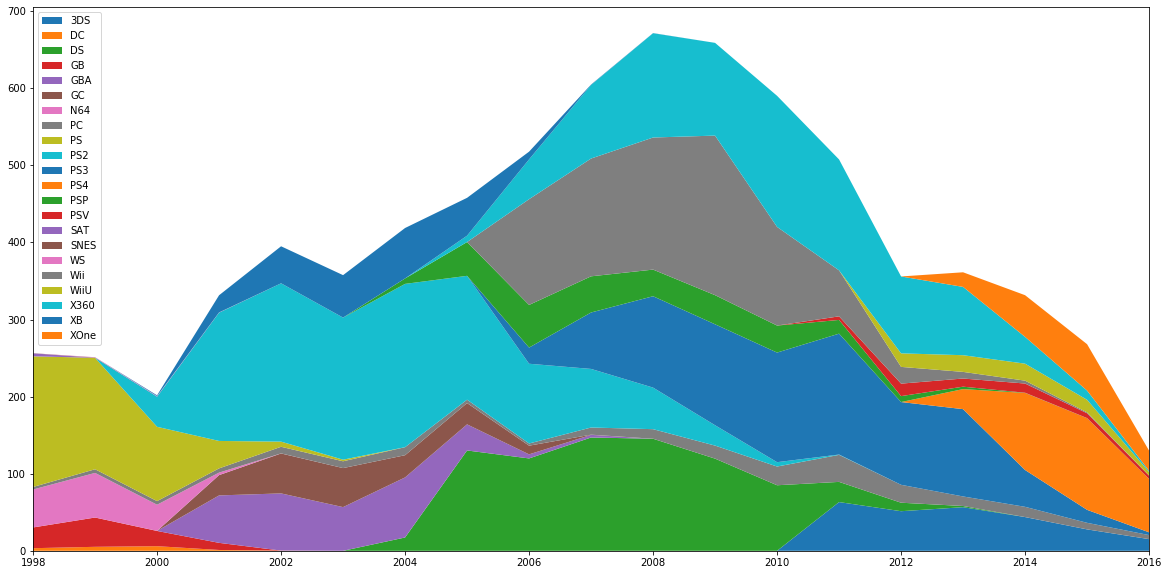

In [151]:
years = np.unique(file['year_of_release'].values)[1:]
platf = np.unique(file['platform'].values)
plot_array = np.zeros((len(platf),len(years)))
min_yr = len(years)

all_graphs = filtered_year.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

i = 0
for p in platf:
    tmp = all_graphs[all_graphs["platform"] == p]
    indx = np.intersect1d(years,tmp['year_of_release'].values, return_indices=True)[1]
    if len(indx)==0:
        plot_array = np.delete(plot_array, i, 0)
        platf = np.delete(platf, i)
    else:
        plot_array[i][indx] = tmp['total_sales'].values
        i+=1
        if np.min(indx)<min_yr:
            min_yr = np.min(indx)

fig, ax = plt.subplots(figsize=(20, 10))
ax.stackplot(years, plot_array, labels=platf)
plt.xlim(years[min_yr], np.max(years))
ax.legend(loc='upper left')
plt.show()

In [43]:
filtered_games = filtered_year['name'].value_counts()
filtered_games.sort_values(ascending=False)

Need for Speed: Most Wanted                                            12
LEGO Marvel Super Heroes                                                9
Ratatouille                                                             9
FIFA 14                                                                 9
LEGO Jurassic World                                                     8
                                                                       ..
Hyperdimension Neptunia Vs. Sega Hard Girls: Yume no Gattai Special     1
Earthworm Jim 3D                                                        1
Atelier Annie: Alchemists of Sera Island                                1
Super Swing Golf                                                        1
Tekken 3                                                                1
Name: name, Length: 10333, dtype: int64

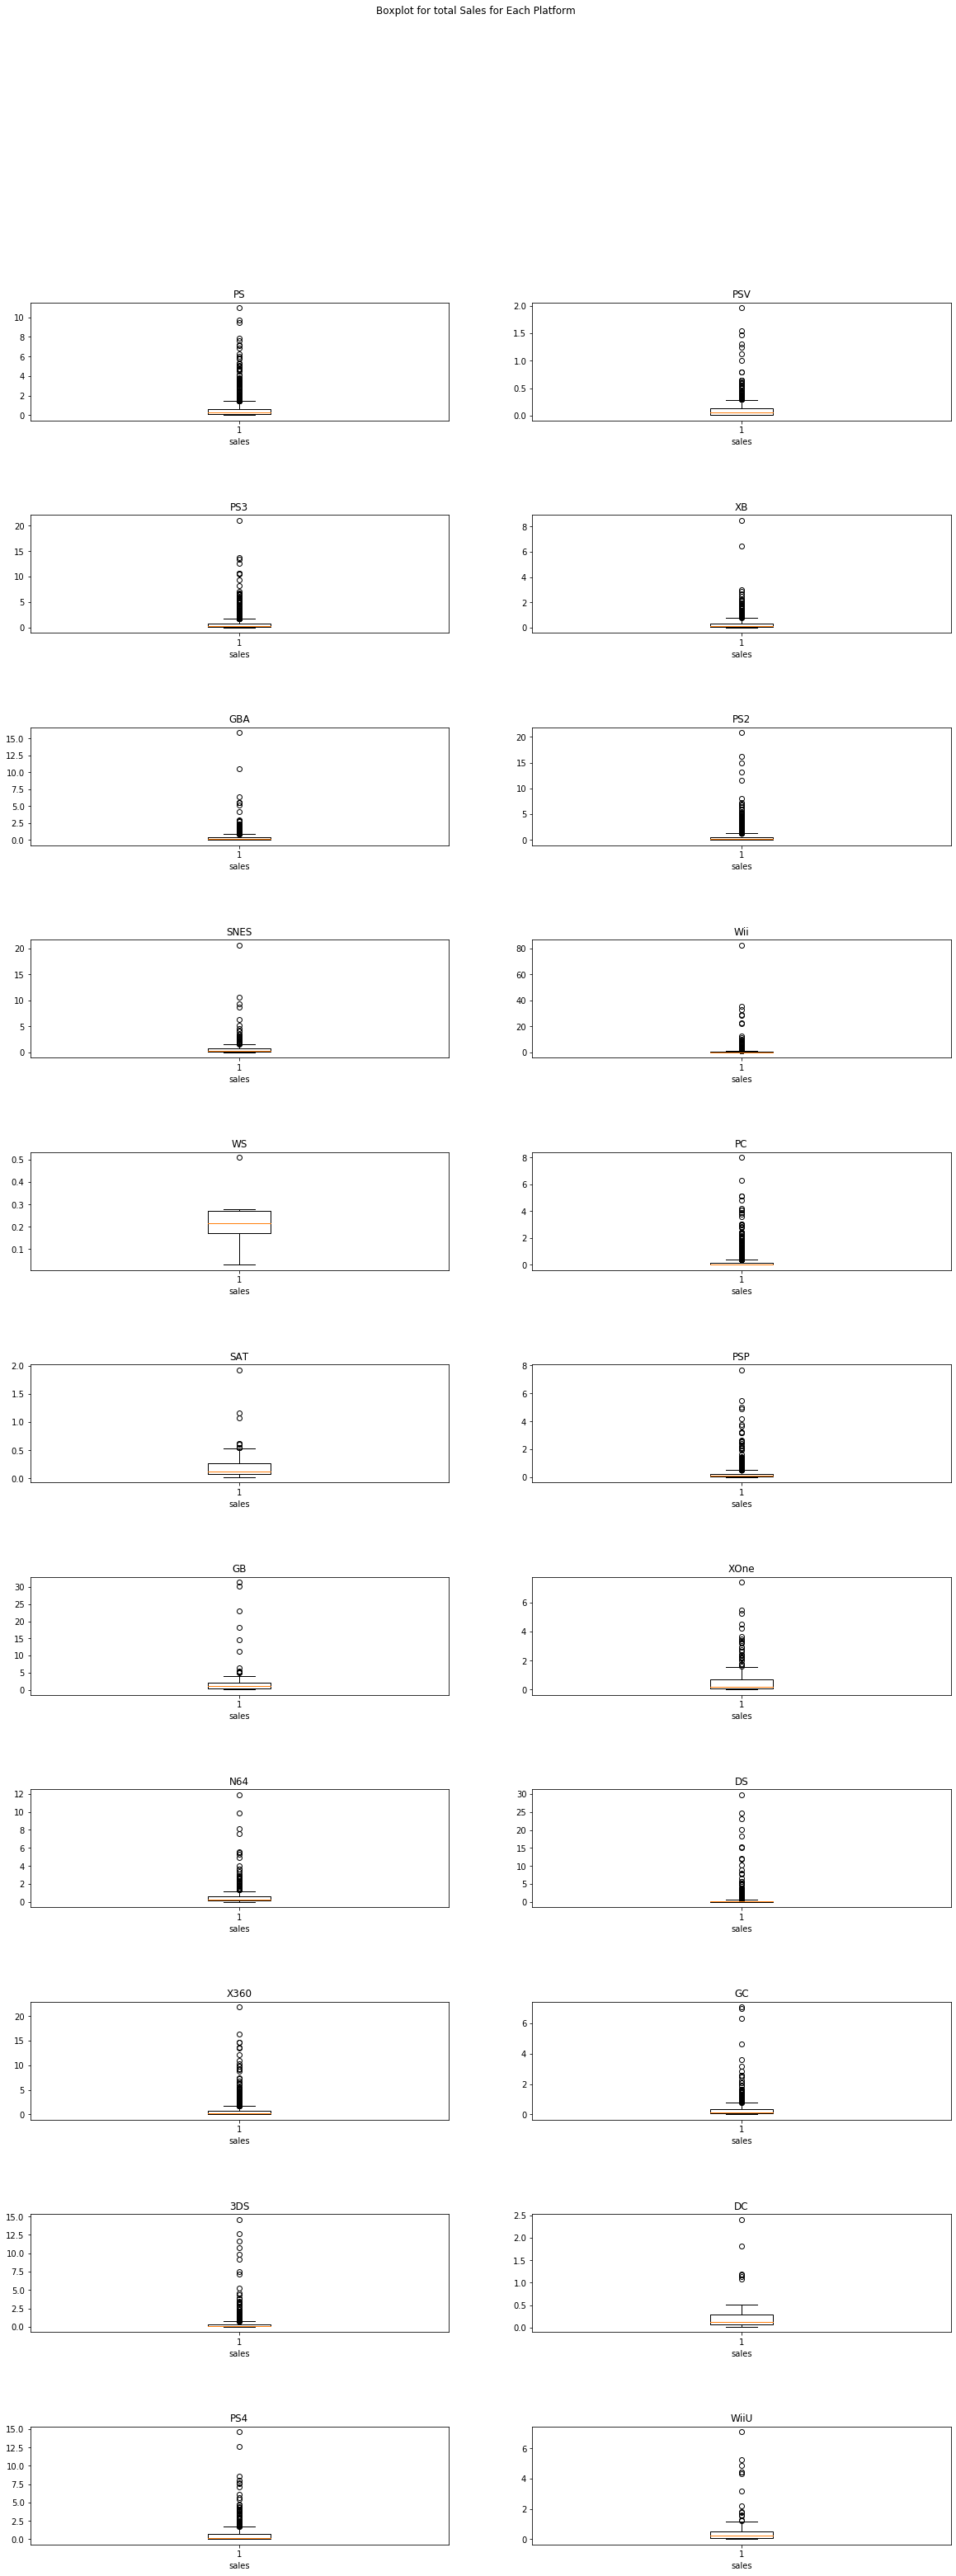

In [44]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20, 50))
fig.subplots_adjust(hspace=0.8)
fig.suptitle('Boxplot for total Sales for Each Platform')
all_platforms = set(filtered_year['platform'])
for ax, platform in zip(axes.flatten(), all_platforms):
    ax.boxplot(file.query('platform==@platform')['total_sales'])
    ax.set(title=platform, xlabel="sales")

No handles with labels found to put in legend.


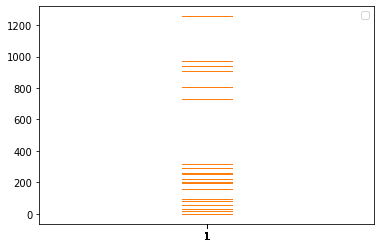

In [45]:
all_box = file.groupby(['platform'])['total_sales'].sum().reset_index()
for platform in all_box.platform.unique():
    tmp = all_box[all_box["platform"] == platform]
    plt.boxplot(tmp["total_sales"])
plt.legend()

<div class="alert alert-success" role="alert">
Those are some very nice boxplots!
</div>
<div class="alert alert-warning" role="alert">
<del>However, see if you can display them all simultaneously on a single graph - that would be very informative ;) </del>
</div>

<div class="alert alert-info" role="alert">
  I tried boxplots in the one. But i couldn't achieve the results. Please let me know how to do this. Thanks in advance.
</div>
<div class="alert alert-warning" role="alert">
That's allright ;) Check out the cell below:
</div>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


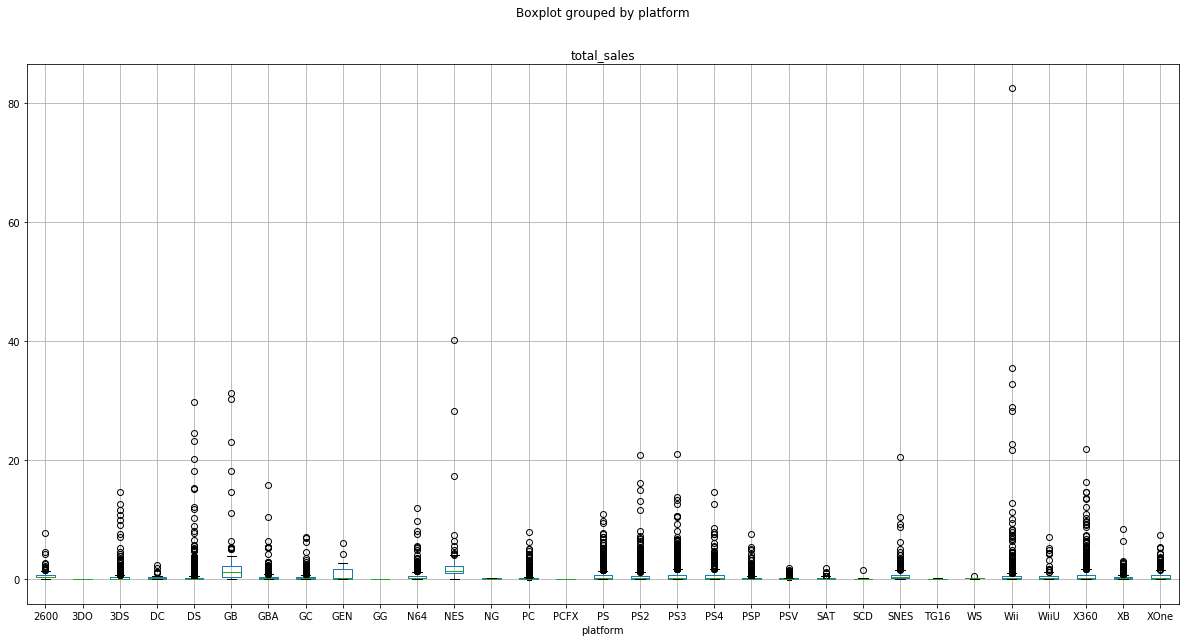

In [76]:
file.boxplot(column='total_sales', by='platform', figsize=(20, 10))

In [46]:
sales_platform = filtered_year.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_platform.sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,454.72
PS4,314.14
GBA,312.88
PSP,289.53


In [47]:
sales_platform['average_sales'] = filtered_year.pivot_table(index='platform', values='total_sales').sort_values(by='total_sales', ascending=False)
sales_platform.sort_values(by='average_sales',ascending=False)

,total_sales,average_sales
platform,,
GB,93.90,2.041304
PS4,314.14,0.801378
X360,961.24,0.780227
PS3,931.34,0.713124
Wii,891.18,0.692986
XOne,159.32,0.645020
PS,454.72,0.629806
N64,144.41,0.579960
PS2,1233.56,0.579953


**Based on my analysis, the average sales for platform GB is higher. The differences in sales is varied from platform to platform. There is no significance with the sales difference.

<div class="alert alert-success" role="alert">
Seems reasonable, nice!
</div>

In [48]:
popular_platform = filtered_year.query('platform == "PS3" & critic_score != "-1" & user_score != "-1" & critic_score != "-2" & user_score != "-2"')
popular_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
15567,Tom Clancy's Splinter Cell Classic Trilogy HD,PS3,2011,Action,0.02,0.00,0.00,0.00,67.0,6.8,M,0.02
15649,Darksiders,PS3,2010,Action,0.01,0.00,0.00,0.00,82.0,7.9,M,0.01
15742,Invizimals: The Lost Kingdom,PS3,2013,Action,0.00,0.02,0.00,0.00,50.0,5.0,E10+,0.02
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01


**Here i took a popular platform PS2 based on the highest total_sales which i considered as popular platform.

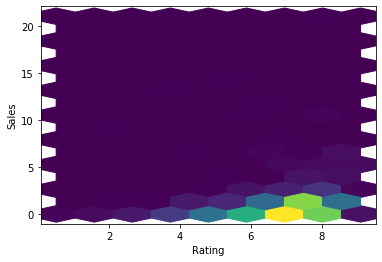

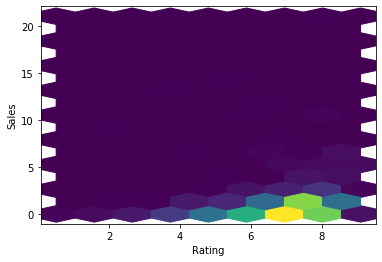

In [49]:
# create data
x = popular_platform['user_score']
y = popular_platform['total_sales']
 
# Make the plot
plt.hexbin(x, y, gridsize=(8,8) )
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(8,8) )
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()



<div class="alert alert-success" role="alert">
Gorgeous looking hexbin! I like that! 
</div>
<div class="alert alert-warning" role="alert">
<del>However, I would recommend adding axis labels to it, to avoid any kind of confusion by the reader ;)<del>
</div>

<div class="alert alert-info" role="alert">
  Added labels for x and y axis.
</div>
<div class="alert alert-success" role="alert">
Very nice!
</div>

** Based on the hexbin plots, the density is more for top rating which means the higher the critic_score & user_score the sales will be high.

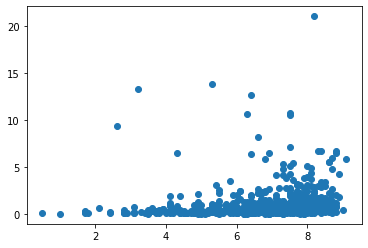

In [50]:
x = popular_platform['user_score']
y = popular_platform['total_sales']
plt.scatter(x, y)
plt.show()

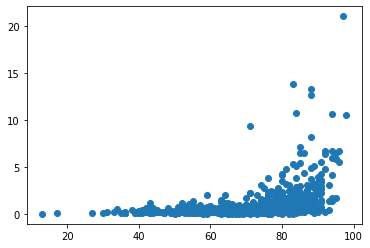

In [51]:
x = popular_platform['critic_score']
y = popular_platform['total_sales']
plt.scatter(x, y)
plt.show()

**Based on the scatter plot, it shows the higher the score, the sales are high.

<div class="alert alert-success" role="alert">
That makes sense =)
</div>

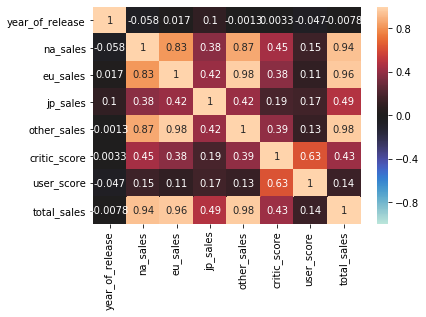

In [52]:
sns.heatmap(popular_platform.corr(), annot = True, vmin=-1, vmax=1, center= 0)

**Based on the correlation values of total_sales and critic_score 0.39, user_score 0.17 indicates a week relationship between sales and critic score as well sales and user score. 

<div class="alert alert-success" role="alert">
Correct!
</div>

In [53]:
popular_platform['name']

16                                  Grand Theft Auto V
34                          Call of Duty: Black Ops II
37                      Call of Duty: Modern Warfare 3
41                             Call of Duty: Black Ops
54                                      Gran Turismo 5
                             ...                      
15567    Tom Clancy's Splinter Cell Classic Trilogy HD
15649                                       Darksiders
15742                     Invizimals: The Lost Kingdom
16146                           Don Bradman Cricket 14
16230                                    Madden NFL 13
Name: name, Length: 775, dtype: object

**I am choosing the game Gran Turismo 4 from the PS2 platform to check the sales of the game on the other platforms.

In [54]:
filtered_year.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-1.0,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


**The game Madden NFL 13 is on 6 platforms. The sales on X360 is higher than other platforms.

In [55]:
filtered_year.query('name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


**The game Grand Theft Auto V is on 5 platforms. The sales on X360 is higher than other platforms.

In [56]:
filtered_year['genre'].value_counts()

Action          3163
Sports          2111
Misc            1644
Role-Playing    1359
Adventure       1236
Shooter         1168
Racing          1133
Simulation       796
Platform         763
Fighting         705
Strategy         611
Puzzle           498
Name: genre, dtype: int64

In [57]:
genre_sales = filtered_year.pivot_table(index='genre', values='total_sales', aggfunc=sum)
genre_sales.sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Action,1593.30
Sports,1202.88
Shooter,934.73
Role-Playing,808.39
Misc,750.93
Racing,626.13
Platform,545.05
Fighting,357.89
Simulation,353.98


**Based on the analysis the action genre has higher sales, while sports is in second highest sales where as puzzle has lowest sales compared to others. 

<div class="alert alert-success" role="alert">
Everything is properly calculated, and the overall conclusions are correct.
</div>

<div class="alert alert-warning" role="alert">
However, I would suggest to provide a slightly more deatailed conclusion on every logical step of your research project ;) 
</div>

## Step 4. Create a user profile for each region

**For each region (NA, EU, JP), determine:
**The top five platforms. Describe variations in their market shares from region to region.
**The top five genres. Explain the difference.
**Do ESRB ratings affect sales in individual regions?

In [58]:
top_five_platforms =['PS2','X360','PS3','Wii','DS']

**These are the top five platforms from the previous analysis based on total sales.

In [59]:
filtered_year.query('platform == ["PS2","X360","PS3","Wii","DS"]').pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'])

,eu_sales,jp_sales,na_sales
platform,,,
DS,0.088873,0.082547,0.179392
PS2,0.156385,0.064664,0.269356
PS3,0.250544,0.060804,0.298721
Wii,0.200871,0.053095,0.378593
X360,0.217792,0.009984,0.483555


**The DS platform has varied sales with na region. The eu and jp sales are not much varied they have very little difference, na sales is almost the sum of two regions.
**The PS2 platform has varied sales in 3 regions. The na sales is much higher, and medium sales in eu region, and lowest sales in jp region.
**The PS3 platform has varied sales in 3 regions. The na sales is much higher, and little lesser in eu and very low in jp region.
**The Wii platform has varied sales in 3 regions. The na sales is much higher, and little less in eu and lowest in jp region.
**The X360 platform has varied sales in 3 regions. The X360 sales is higher in na, little less in eu and lowest in jp region.

**Based on this overall analysis the highest sales is in na region, medium sales is in eu region and lowest sales in jp region.

In [60]:
top_five_genres = ['Action','Sports','Shooter','Role-Playing','Misc']

**These are the top 5 genres based on sales from the previous analysis.

In [61]:
filtered_year.query('genre == ["Action","Sports","Shooter","Role-Playing","Misc"]').pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'])

,eu_sales,jp_sales,na_sales
genre,,,
Action,0.154018,0.044477,0.248919
Misc,0.123692,0.056344,0.232816
Role-Playing,0.127520,0.199956,0.227189
Shooter,0.257800,0.020488,0.435454
Sports,0.169029,0.041577,0.298048


**The Action genre has varied sales in 3 regions. The highest sales is in na region, and a medium sales in eu region, and lowest sales in jp region.
**The Misc genre has varied sales in 3 regions. The highest sales is in na region, and a medium sales in eu region, and lowest sales in jp region.
**The Role-Playing has varied sales in 3 regions. The highest sales is in na region, and a medium sales in jp region, and lowest sales in eu region.
**The Shooter has varied sales in 3 regions. The highest sales is in na region, and a medium sales in eu region, and lowest sales in jp region.
**The Sports has varied sales in 3 regions. The highest sales is in na region, and a medium sales in eu region, and lowest sales in jp region.

**Based on the analysis on the top 5 genres, the market sales in na region is higher compared to other regions, and the lowest sales is in jp region except in Role-Playing genre it has medium sales, where eu has lowest sales in Role-Playing genre.

In [62]:
ratings = filtered_year['rating'].value_counts()
ratings

xyz     5450
E       3914
T       2891
M       1530
E10+    1392
EC         8
AO         1
RP         1
Name: rating, dtype: int64

In [63]:
rating_sales = filtered_year.query('rating != "xyz"').pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'])
rating_sales

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.610000,0.000000,1.260000
E,0.178554,0.049854,0.324024
E10+,0.131703,0.028879,0.248204
EC,0.013750,0.000000,0.191250
M,0.311471,0.040595,0.480307
RP,0.030000,0.000000,0.000000
T,0.141989,0.049346,0.254016


**ESRB rating system M -for age 17, AO - for players 18 and over, E - Everyone(for all ages), E10+ - for ages and 10 up, EC - Early Childhood, RP - rating pending, T - Teens 13 and older.

**I am ignoring xyz which is used to represent a missing values for analysis. 

**The games for everyone with E rating is having higher sales in na region, and lowest in jp region.

**Based on all ratings, the data says sales in na region for all ratings is higher than other regions. So, there is no particular rating which affects sales in individual regions.

<div class="alert alert-success" role="alert">
This step is done very thoroughly, I liked that!
</div>

<div class="alert alert-warning" role="alert">
However, adding dome simple graphs for visualisation would greatly increase the informativeness ;)
</div>

## Step 5. Test the following hypotheses:

**—Average user ratings of the Xbox One and PC platforms are the same.
**—Average user ratings for the Action and Sports genres are different.
**Set the alpha threshold value yourself.
**Explain:
**—How you formulated the null and alternative hypotheses
**—What significance level you chose to test the hypotheses, and why

In [64]:
rating_xone = filtered_year.query("platform=='XOne' and user_score!=-1")['user_score']
rating_pc = filtered_year.query("platform=='PC' and user_score!=-1")['user_score']

print(rating_xone.head())
print(rating_pc.head())

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64
85     7.6
138    7.3
192    4.0
218    8.2
288    7.9
Name: user_score, dtype: float64


In [65]:
alpha = .05 # critical statistical significance level

results_platform = st.ttest_ind(
        rating_xone, 
        rating_pc,
        equal_var = False
)
print('p-value: ', results_platform.pvalue)

if (results_platform.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.018279850832572015
We reject the null hypothesis


**I have used 0.05 as alpha value. Testing hypothesis on the equality of two population means.
**P-value is 0.018 and recieved reject null hypothesis, which shows there is a difference in average user ratings between Xone and PC platforms.

In [66]:
rating_action = filtered_year.query("genre=='Action' and user_score!=-1")['user_score']
rating_sports = filtered_year.query("genre=='Sports' and user_score!=-1")['user_score']

print(rating_action.head())
print(rating_sports.head())

16    8.2
17    9.0
23    8.1
24    8.7
38    8.5
Name: user_score, dtype: float64
0     8.0
3     8.0
13    7.7
15    7.4
77    4.3
Name: user_score, dtype: float64


In [67]:
alpha = .05 # critical statistical significance level

results_genre = st.ttest_ind(
        rating_action, 
        rating_sports,
        equal_var = False
)

print('p-value: ', results_genre.pvalue)

if (results_genre.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  1.2350889877006774e-13
We reject the null hypothesis


**I have used 0.05 as alpha value. Testing hypothesis on the equality of two population means.
**P-value is 1.23 and recieved reject null hypothesis, which shows there is a difference in average action and sports genres.

## 6. General Conclusion

**1. PS2,X360,PS3,Wii,DS are top 5 platforms.
**2. PS2 platform have high sales in 2004.
**3. The average duration for platforms in the market is 7.6 years.
**4. Latest platforms between 2014 and 2016 are 3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne.
**5. The differences in sales is varied with platform to platform. There is no significance between the platforms.
**6. The higher the critic and user score the sales will be high.
**7. The higher the score, the sales are high.
**8. There is no relationship between critic_score and total sales and user score and total sales.
**9. The action genre has higher sales, while puzzle genre has lowest sales.
**10. The highest market is in na region and lowest in jp region.
**11. Average rating of XOne and PC are different based on hypothesis.
**12. Average rating of Action and Sports genre are different based on hypothesis.

<div class="alert alert-success" role="alert">
All in all, I was very impressed by your thorough analysis, neat code style, and by your thought process in general. I think this is a very strong project. There were little to no real issues -- only one tiny "red" note, and the rest are "yellow", which basically mean an advice on how to improve your project and/or future work. After you fix it, I will gladly consider the project accepted. Good luck! =)
<br>
<br>
Cheers!
</div>

<div class="alert alert-success" role="alert">
  
Well, here we go! You did absolutely fantastic! And since there are only a few non-critical (yellow) notes that remain, I'm accepting your project.
    
Wish you best of luck in your future studies!

Cheers!!!
</div>